<a href="https://colab.research.google.com/github/ecomunick/python_projects/blob/edit/pandas/01_data_exploration_nyc_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sys
#print(sys.version)
#print('pandas version', pd.__version__)

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 85)

In [2]:
df = pd.read_csv('/content/2015_Street_Tree_Census_-_Tree_Data.csv')

In [3]:
# seeing the data
df.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [4]:
# number of rows and columns #(359431, 45)
df.shape

(683788, 45)

In [5]:
# checking data types and null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

,0
tree_id,0
block_id,0
created_at,0
tree_dbh,0
stump_diam,0
curb_loc,0
status,0
health,31616
spc_latin,31619
spc_common,31619


In [6]:
# looks like some amount of variable's data are missing
missing_data = []

for value, column in df.items():
  x = column.isnull().sum()
  if x > 0:
    missing_data.append((value, x))  # Append a tuple of (column_name, missing_count)

missing_data

# adding into a df
missing_df = pd.DataFrame(missing_data, columns=['Column Name', 'Missing Count']).sort_values(by='Missing Count', ascending=False)
missing_df

,Column Name,Missing Count
4,guards,603922
3,steward,519438
6,problems,457944
1,spc_latin,31619
2,spc_common,31619
0,health,31616
5,sidewalk,31616
10,bbl,9559
9,bin,9559
8,census tract,6519


In [7]:
# what are the situation, general feeling of New York's Trees
# So that we can reject some columns that are related w/ location for now.
# let's delete some location column since i'm interested in trees of nyc in general
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [8]:
# keeping only columns of interest
df_ohne_location = df[['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'spc_latin',
      'steward', 'sidewalk', 'problems', 'root_stone', 'root_grate', 'root_other',
      'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']]

df_ohne_location.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [9]:
# figure out numerical values and if there are some null values
df_ohne_location.isnull().sum()

,0
tree_id,0
tree_dbh,0
stump_diam,0
curb_loc,0
status,0
health,31616
spc_latin,31619
steward,519438
sidewalk,31616
problems,457944


In [10]:
# show all the ones where 'health' is a non value and decide what to do next.
# for now, just exploring the data and seeing a bunch of NaN
df_ohne_location[df_ohne_location['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [11]:
df_ohne_location.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


array([[<Axes: title={'center': 'tree_id'}>,
        <Axes: title={'center': 'tree_dbh'}>],
       [<Axes: title={'center': 'stump_diam'}>, <Axes: >]], dtype=object)

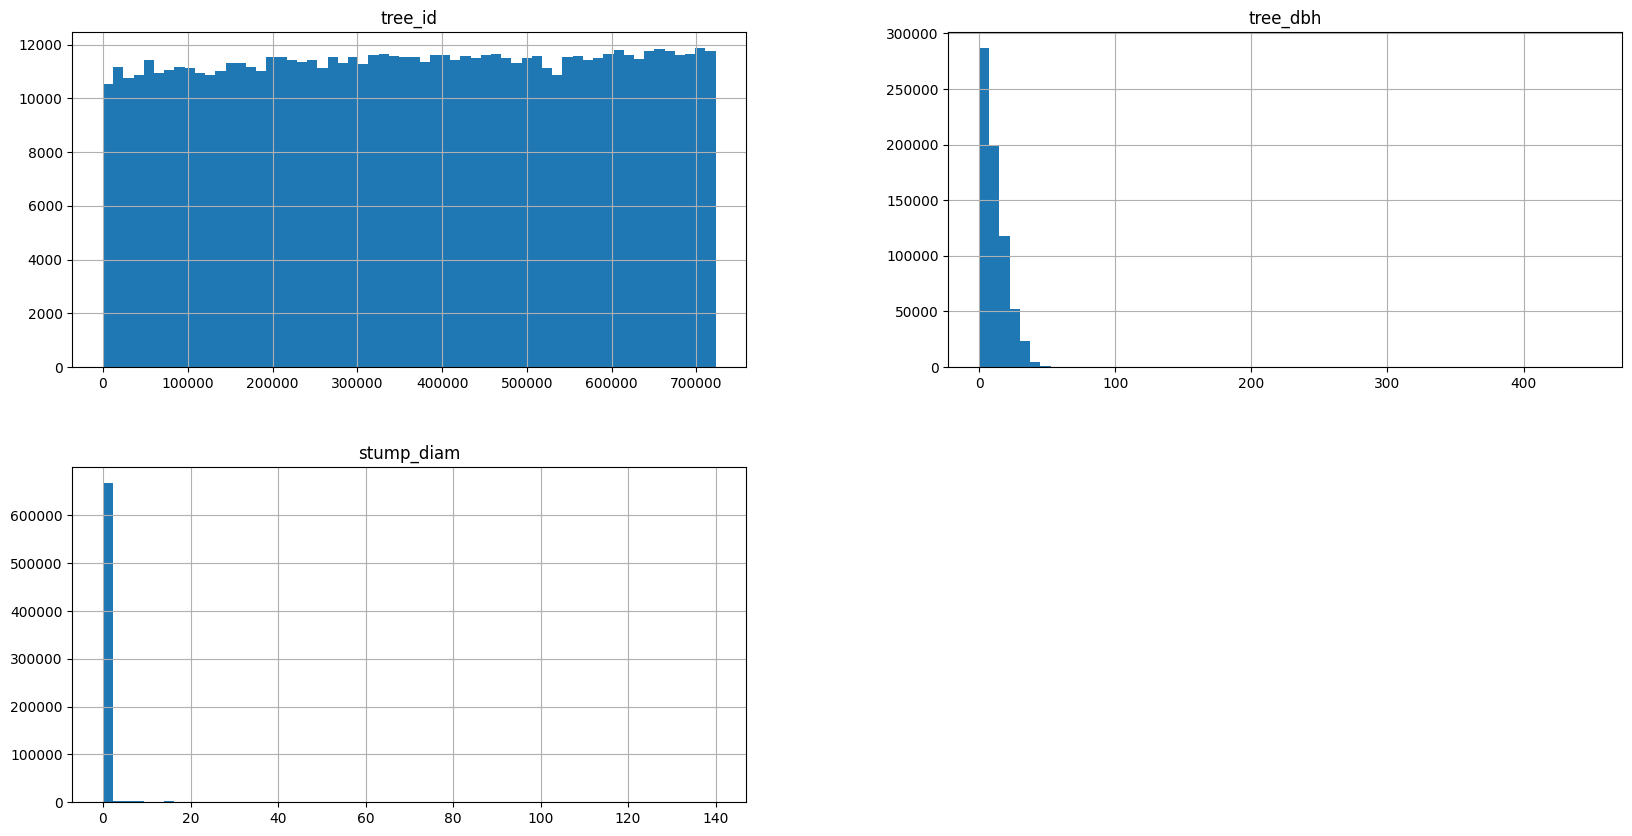

In [12]:
# see the distribution
df_ohne_location.hist(bins=60, figsize=(20,10))

# tree_id should be ignored, since id the id of trees and the other one looks like to have some thing weird as maximum values

In [13]:
# let's see some high values for 'tree_dbh' where the dbh is higher than 50 inches
# we got 102 values
big_trees = df_ohne_location[df_ohne_location['tree_dbh'] > 50]
big_trees.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
3738,199546,51,0,OnCurb,Alive,Good,Acer saccharinum,NaN,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No


array([[<Axes: title={'center': 'tree_id'}>,
        <Axes: title={'center': 'tree_dbh'}>],
       [<Axes: title={'center': 'stump_diam'}>, <Axes: >]], dtype=object)

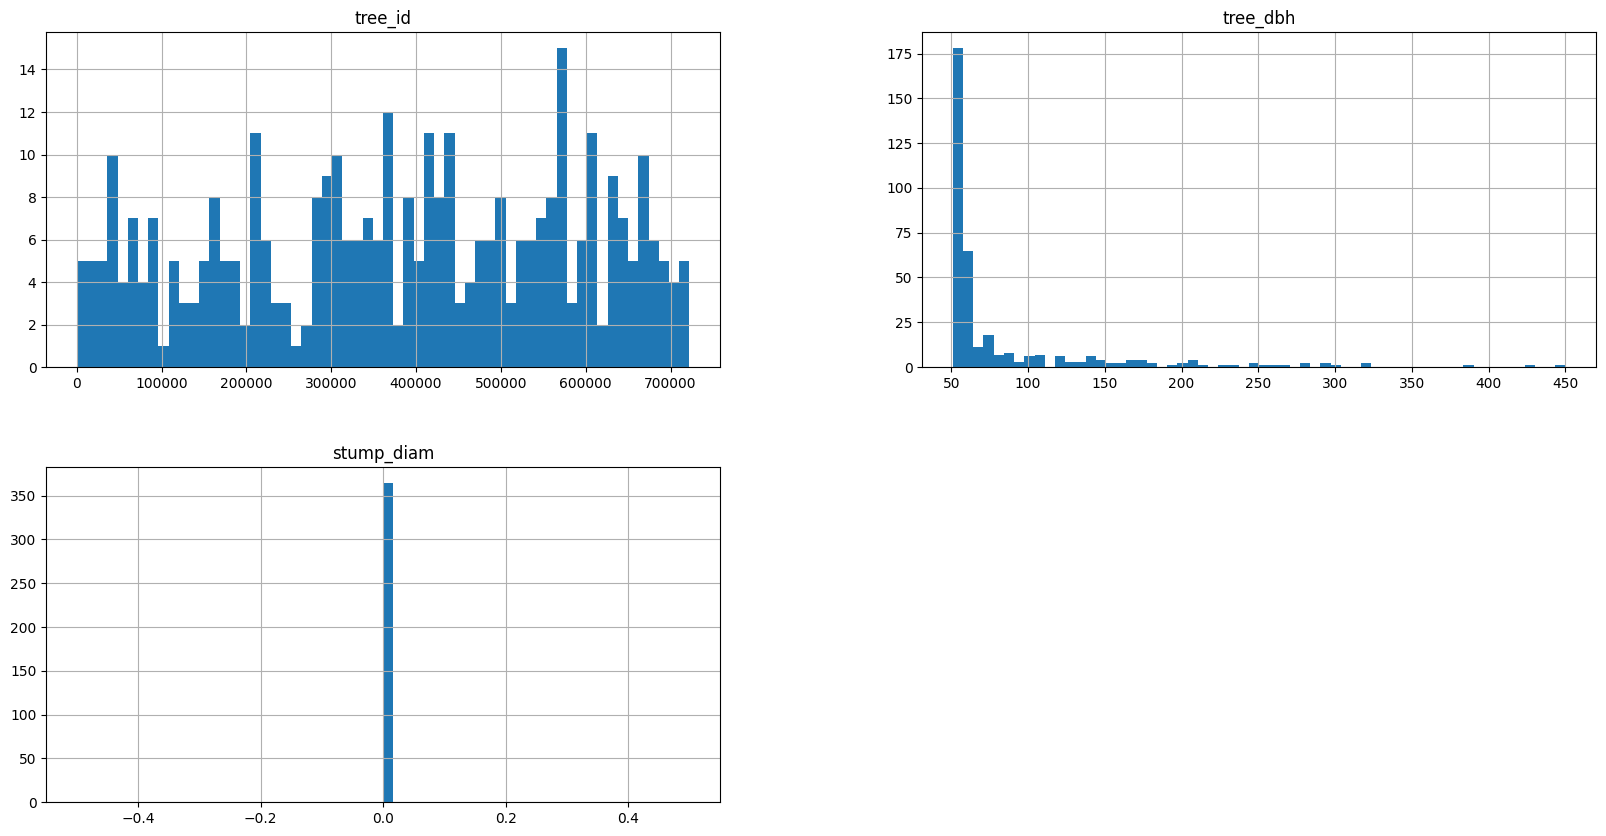

In [14]:
# lets visualize that:
big_trees.hist(bins=60, figsize=(20,10))

<Axes: xlabel='tree_id', ylabel='tree_dbh'>

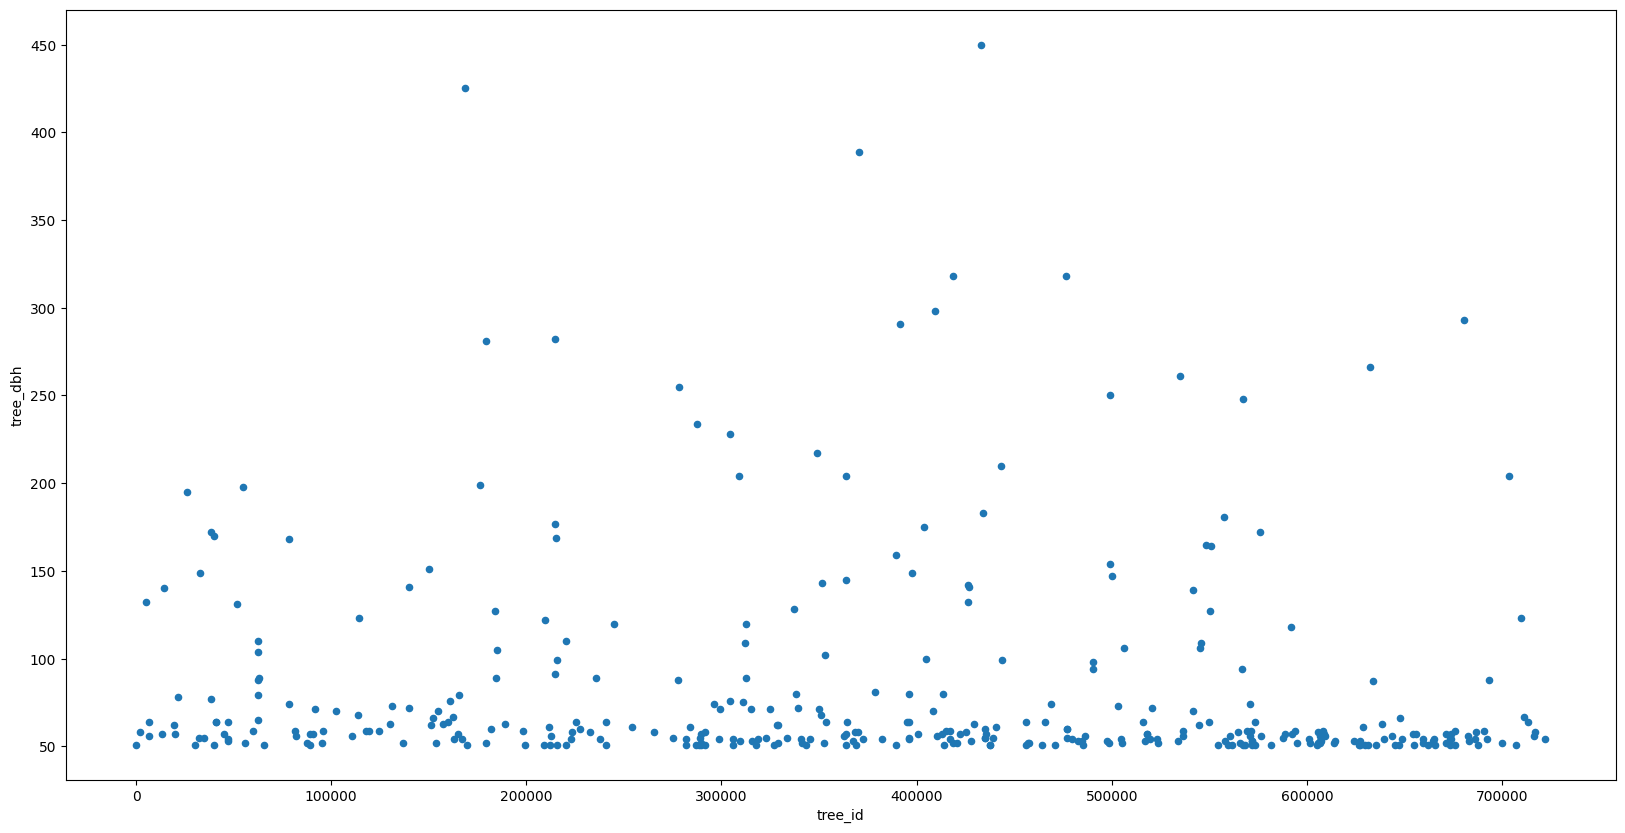

In [15]:
big_trees[['tree_id', 'tree_dbh']].plot(kind='scatter', x='tree_id', y='tree_dbh', figsize=(20,10))

<Axes: xlabel='spc_latin'>

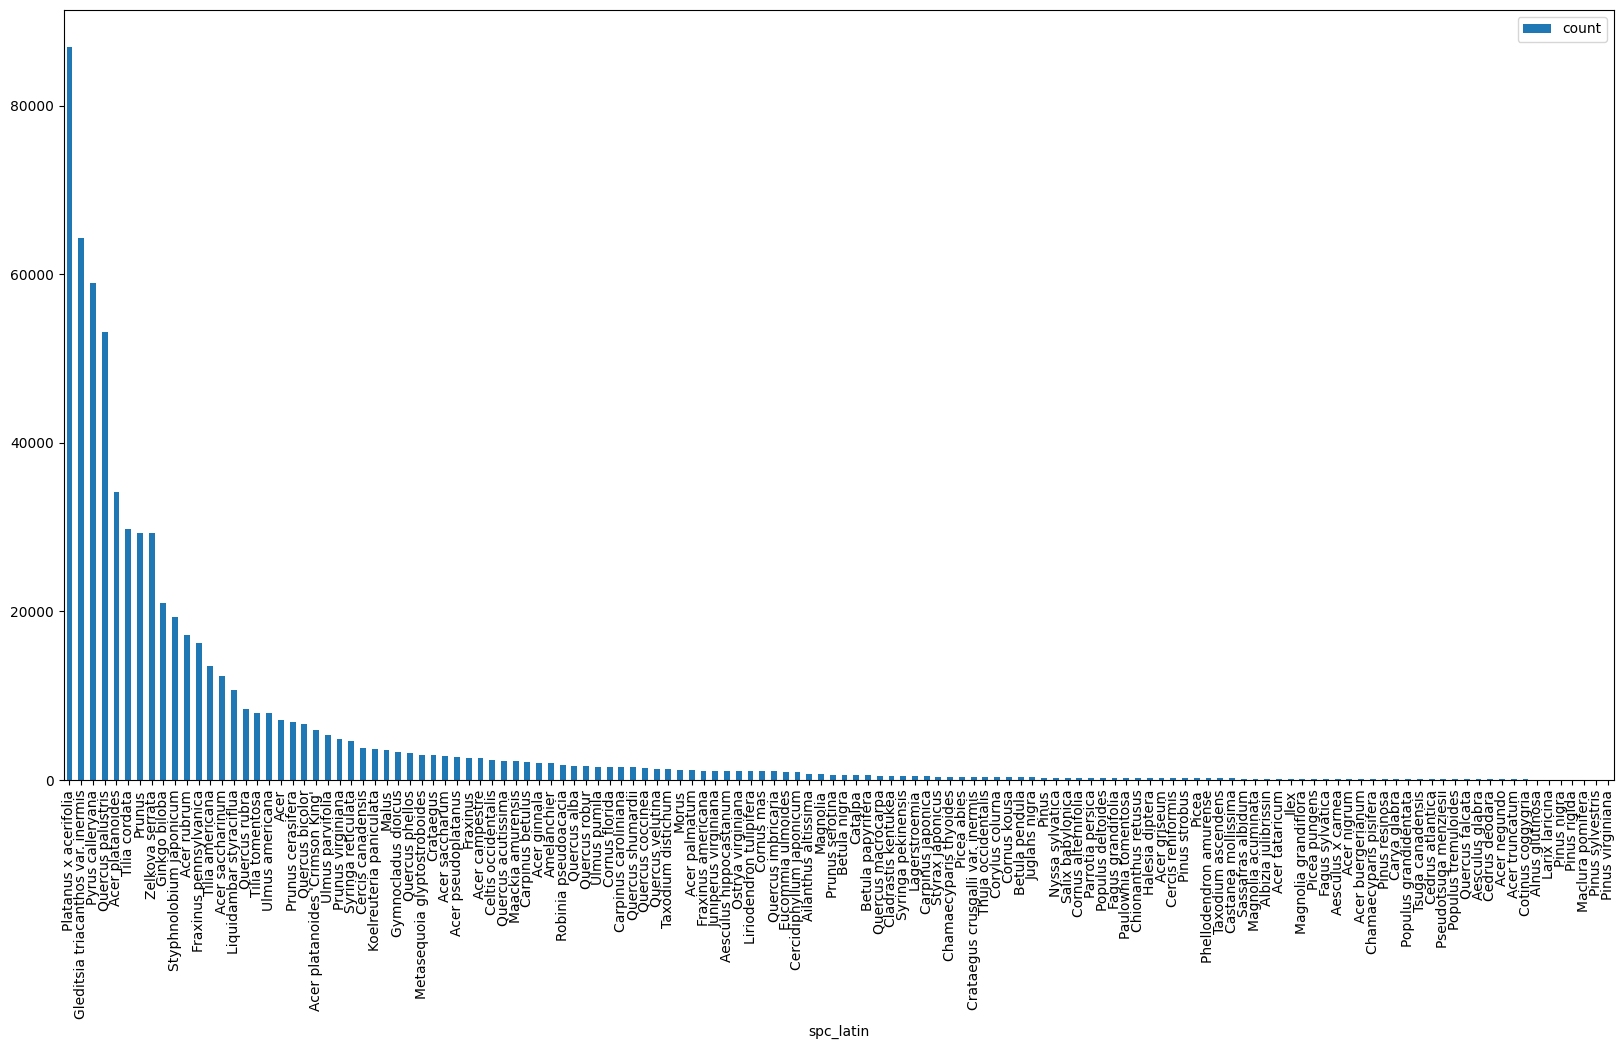

In [16]:
# see the distribution of differents latin names
df_ohne_location['spc_latin'].value_counts()

# to visualize, transform into a dataframe
pd.DataFrame(df_ohne_location['spc_latin'].value_counts()).plot(kind='bar', figsize=(20,10))

In [17]:
# lets see other variables with missing data like 'steward'
df_ohne_location['steward'].value_counts(dropna=False) # dropna=False to see all missing values, inclusive

,count
steward,
NaN,519438
1or2,143557
3or4,19183
4orMore,1610


In [18]:
# looking into df_ohne_location['steward']
df_ohne_location[df_ohne_location['steward'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
7,208649,9,0,OnCurb,Alive,Good,Tilia americana,NaN,NoDamage,MetalGrates,No,Yes,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683781,155348,20,0,OnCurb,Alive,Good,Quercus palustris,NaN,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No


In [19]:
df_ohne_location['sidewalk'].value_counts(dropna=False) # dropna=False to see all missing values, inclusive

,count
sidewalk,
NoDamage,464978
Damage,187194
NaN,31616


In [20]:
# looking into df_ohne_location['sidewalk']
df_ohne_location[df_ohne_location['sidewalk'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [21]:
df_ohne_location['status'].value_counts(dropna=False) # dropna=False to see all missing values, inclusive

,count
status,
Alive,652173
Stump,17654
Dead,13961


In [22]:
df_ohne_location['curb_loc'].value_counts(dropna=False) # dropna=False to see all missing values, inclusive

,count
curb_loc,
OnCurb,656896
OffsetFromCurb,26892


In [23]:
df_ohne_location['status'].unique()

array(['Alive', 'Stump', 'Dead'], dtype=object)

In [24]:
# check if there are a mismatching between status == Stump and health; create a new subset
stumps = df_ohne_location[df_ohne_location['status'] == 'Stump']
stumps.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [25]:
deads = df_ohne_location[df_ohne_location['status'] == 'Dead']
deads

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [26]:
# if we do not want trees that are not alive, we can remove also 'Stumps' and 'Deads' trees
df_ohne_loca_and_deads_trees = df_ohne_location[(df_ohne_location['status'] != 'Stump') & (df_ohne_location['status'] != 'Dead')]
df_ohne_loca_and_deads_trees.head()

## but i prefer go with other perspective also, creating new featuresm instead of removing them... deciding what to do with ['health']...

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [27]:
# to use with precaution; i don't think this is a good approach
df_ohne_loca_and_deads_trees.shape

(652173, 19)

In [28]:
# lets check how the problems are distributed
df_ohne_location.columns

Index(['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health',
       'spc_latin', 'steward', 'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other'],
      dtype='object')

In [29]:
tree_problems = df_ohne_location[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_problems.head()

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No


In [30]:
# applying values_counts function to each of the series and then we are able to see the values to all of them
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


In [31]:
# looking into df_ohne_location['health']
df_ohne_location[df_ohne_location['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [32]:
df_ohne_location['health'].value_counts(dropna=False) # dropna=False to see all missing values, inclusive

,count
health,
Good,528850
Fair,96504
NaN,31616
Poor,26818


In [33]:
# decide later on what to do with 'health' NaNs
df_ohne_location['health'].unique()

array(['Fair', 'Good', 'Poor', nan], dtype=object)

In [34]:
# End of exploration for now

## 2nd Part: Data Exploration/Cleaning





In [35]:
# Different options to treat the variables where there are missing values >> change to Not Applicable
# ['root_stone', 'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 'brch_other']
df_ohne_location.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [36]:
df_ohne_location.columns

Index(['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health',
       'spc_latin', 'steward', 'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other'],
      dtype='object')

In [37]:
df_ohne_location['health'].value_counts(dropna=False) # dropna=False to see all missing values, inclusive

,count
health,
Good,528850
Fair,96504
NaN,31616
Poor,26818


In [38]:
# lets create a mask to fill in 'health' only where the ['status'] == 'Stump' | ['status'] == 'Dead'
mask = ((df_ohne_location['status'] == 'Stump') | (df_ohne_location['status'] == 'Dead'))

In [39]:
# using the mask (only the rows in the mask) we are saying to use only the status == stumps pr dead in a given column: health
# the first specify the row, and second specify the column and fill with not applicable
df_ohne_location.loc[mask, 'health'] = df_ohne_location.loc[mask, 'health'].fillna('Not Applicable')

In [40]:
df_ohne_location[df_ohne_location['status'] == 'Stump'].head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [41]:
df_ohne_location[df_ohne_location['status'] == 'Dead'].head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,Not Applicable,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [42]:
df_ohne_location.isna().sum()

,0
tree_id,0
tree_dbh,0
stump_diam,0
curb_loc,0
status,0
health,1
spc_latin,31619
steward,519438
sidewalk,31616
problems,457944


In [43]:
# Fill columns ['spc_latin', 'steward', 'sidewalk', 'problems'] with 'Not Applicable' only
# where 'health' is 'Not Applicable'

df_ohne_location.loc[df_ohne_location['health'] == 'Not Applicable', ['spc_latin', 'steward', 'sidewalk', 'problems']] = 'Not Applicable'
df_ohne_location.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [44]:
# we still have some huge missing values in 'steawards' and ''problems'
df_ohne_location.isnull().sum()

,0
tree_id,0
tree_dbh,0
stump_diam,0
curb_loc,0
status,0
health,1
spc_latin,5
steward,487823
sidewalk,1
problems,426329


In [45]:
# lets look into those that still have missing values: ['health', 'spc_latin', 'steward', 'sidewalk', 'problems']
df_ohne_location[df_ohne_location['health'].isna()]

# looks like one row, index #195071 has only the tree_id #395035 and could be deleted

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No


In [46]:
# confirmuing and deleting
df_ohne_location[df_ohne_location.index == 195071]
df_ohne_location = df_ohne_location.drop(index=195071)

In [47]:
df_ohne_location[df_ohne_location['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No


In [48]:
df_ohne_location[df_ohne_location['sidewalk'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
346299,540677,7,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [49]:
df_ohne_location['sidewalk'].value_counts(dropna = False)
# since is only one valuea and status == alive, probably i'll fill out with the most commoon value of sidewalk ('NoDamage') is the most common

,count
sidewalk,
NoDamage,464977
Damage,187194
Not Applicable,31615
NaN,1


In [50]:
df_ohne_location[df_ohne_location['steward'].isna()].head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
7,208649,9,0,OnCurb,Alive,Good,Tilia americana,NaN,NoDamage,MetalGrates,No,Yes,No,No,No,No,No,No,No


In [51]:
df_ohne_location['steward'].value_counts(dropna=False) # dropna=False to see all missing values, inclusive

,count
steward,
NaN,487823
1or2,143556
Not Applicable,31615
3or4,19183
4orMore,1610


In [52]:
# probably fill it with something "could observed" or even check if there are a database of tree_id with specification
df_ohne_location[df_ohne_location['spc_latin'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
356613,562532,4,0,OnCurb,Alive,Good,NaN,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
427541,630814,11,0,OnCurb,Alive,Poor,NaN,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
431417,651014,40,0,OnCurb,Alive,Good,NaN,NaN,Damage,Stones,Yes,No,No,No,No,No,No,No,No
608632,47941,5,0,OnCurb,Alive,Good,NaN,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
656960,150745,3,0,OnCurb,Alive,Good,NaN,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No


In [53]:
# tehre are also a bunch of NaN but also with status == alive and health == good as well with sidewalk == NoDamage
df_ohne_location[df_ohne_location['problems'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
5,190422,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
6,190426,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
8,209610,6,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,NaN,Damage,NaN,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,NaN,NoDamage,NaN,No,No,No,No,No,No,No,No,No


In [54]:
# maybe could be fair replace the NaN's problems into None,
# if ['root_stone',	'root_grate',	'root_other',	'trunk_wire',	'trnk_light',	'trnk_other',	'brch_light',	'brch_shoe', 'brch_other'] == No
# and 'status' == 'Alive' and health 'Good'
df_ohne_location['problems'].value_counts(dropna=False)

,count
problems,
NaN,426329
Stones,95672
Not Applicable,31615
BranchLights,29452
"Stones,BranchLights",17808
...,...
"Stones,MetalGrates,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther",1
"WiresRope,BranchLights,Sneakers",1
"MetalGrates,WiresRope,TrunkLights",1


In [55]:
df_ohne_location.shape

(683787, 19)

In [56]:
# recheck null values again:
df_ohne_location.isnull().sum()

,0
tree_id,0
tree_dbh,0
stump_diam,0
curb_loc,0
status,0
health,1
spc_latin,5
steward,487823
sidewalk,1
problems,426329


In [57]:
df_ohne_location['steward'].value_counts(dropna=False) # dropna=False to see all missing values, inclusive

,count
steward,
NaN,487823
1or2,143556
Not Applicable,31615
3or4,19183
4orMore,1610


In [63]:
# i decide to fill out some with the most common data points
# df_ohne_location['health'].fillna('Good', inplace=True)
# df_ohne_location['sidewalk'].fillna('NoDamage', inplace=True)
# df_ohne_location['spc_latin'].fillna('No observation', inplace=True)

df_ohne_location['health'] = df_ohne_location['health'].fillna('Good')
df_ohne_location['sidewalk'] = df_ohne_location['sidewalk'].fillna('NoDamage')
df_ohne_location['spc_latin'] = df_ohne_location['spc_latin'].fillna('No observation')

df_ohne_location['steward'] = df_ohne_location['steward'].fillna('Not Applicable')

In [74]:
# if ['root_stone',	'root_grate',	'root_other',	'trunk_wire',	'trnk_light',	'trnk_other',	'brch_light',	'brch_shoe', 'brch_other'] == No
# and 'status' == 'Alive' and health 'Good'

# Create a mask for the conditions
mask = (
    (df_ohne_location['root_stone'] == 'No') &
    (df_ohne_location['root_grate'] == 'No') &
    (df_ohne_location['root_other'] == 'No') &
    (df_ohne_location['trunk_wire'] == 'No') &
    (df_ohne_location['trnk_light'] == 'No') &
    (df_ohne_location['trnk_other'] == 'No') &
    (df_ohne_location['brch_light'] == 'No') &
    (df_ohne_location['brch_shoe'] == 'No') &
    (df_ohne_location['brch_other'] == 'No') &
    (df_ohne_location['status'] == 'Alive') &
    (df_ohne_location['health'] == 'Good') &
    (df_ohne_location['health'] =='Fair') &
     (df_ohne_location['sidewalk'] == 'NoDamage')
)

# # Fill 'problems' with 'Good' where the mask is True
df_ohne_location.loc[mask, 'problems'] = df_ohne_location.loc[mask, 'problems'].fillna('Not Applicable')

In [77]:
# mask = ((df_ohne_location['health'] =='Fair') & (df_ohne_location['sidewalk'] == 'NoDamage'))
# # # Fill 'problems' with 'Good' where the mask is True
# df_ohne_location.loc[mask, 'problems'] = df_ohne_location.loc[mask, 'problems'].fillna('Not Applicable')

In [78]:
# recheck null values again:
df_ohne_location.isnull().sum()

,0
tree_id,0
tree_dbh,0
stump_diam,0
curb_loc,0
status,0
health,0
spc_latin,0
steward,0
sidewalk,0
problems,25987


In [79]:
df_ohne_location[df_ohne_location['problems'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
11,203726,8,0,OnCurb,Alive,Poor,Platanus x acerifolia,Not Applicable,NoDamage,NaN,No,No,No,No,No,No,No,No,No
16,204208,2,0,OnCurb,Alive,Fair,Ginkgo biloba,Not Applicable,Damage,NaN,No,No,No,No,No,No,No,No,No
53,196223,17,0,OnCurb,Alive,Fair,Platanus x acerifolia,Not Applicable,Damage,NaN,No,No,No,No,No,No,No,No,No
88,179477,3,0,OnCurb,Alive,Poor,Platanus x acerifolia,3or4,NoDamage,NaN,No,No,No,No,No,No,No,No,No
120,200654,6,0,OnCurb,Alive,Fair,Acer ginnala,Not Applicable,Damage,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683670,189407,9,0,OnCurb,Alive,Fair,Ginkgo biloba,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
683671,189408,2,0,OnCurb,Alive,Fair,Ginkgo biloba,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No
683685,201872,4,0,OnCurb,Alive,Poor,Ginkgo biloba,Not Applicable,NoDamage,NaN,No,No,No,No,No,No,No,No,No
683732,171532,2,0,OnCurb,Alive,Fair,Prunus cerasifera,Not Applicable,Damage,NaN,No,No,No,No,No,No,No,No,No


In [62]:
# the other problems, for now i decide to go with Not identified if
# if ['root_stone',	'root_grate',	'root_other',	'trunk_wire',	'trnk_light',	'trnk_other',	'brch_light',	'brch_shoe', 'brch_other'] == No
# and 'status' == 'Alive' and health 'Good'

# # Create a mask for the conditions
# mask = (
#     (df_ohne_location['root_stone'] == 'No') &
#     (df_ohne_location['root_grate'] == 'No') &
#     (df_ohne_location['root_other'] == 'No') &
#     (df_ohne_location['trunk_wire'] == 'No') &
#     (df_ohne_location['trnk_light'] == 'No') &
#     (df_ohne_location['trnk_other'] == 'No') &
#     (df_ohne_location['brch_light'] == 'No') &
#     (df_ohne_location['brch_shoe'] == 'No') &
#     (df_ohne_location['brch_other'] == 'No') &
#     (df_ohne_location['status'] == 'Alive') &
#     (df_ohne_location['health'] == 'Good')
# )

# # Fill 'problems' with 'Good' where the mask is True
# df_ohne_location.loc[mask, 'problems'] = df_ohne_location.loc[mask, 'problems'].fillna('Good')

# df_ohne_location['problems'] = df_ohne_location['problems'].fillna('Not Applicable')

